<a href="https://colab.research.google.com/github/mcansoylu1/do-not-learn-machine-learning/blob/main/MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##What is Multiple Linear Regression Model 
Multiple linear regression uses several explanatory variables to predict the outcome of a response variable.

#Multiple Linear Regression Model

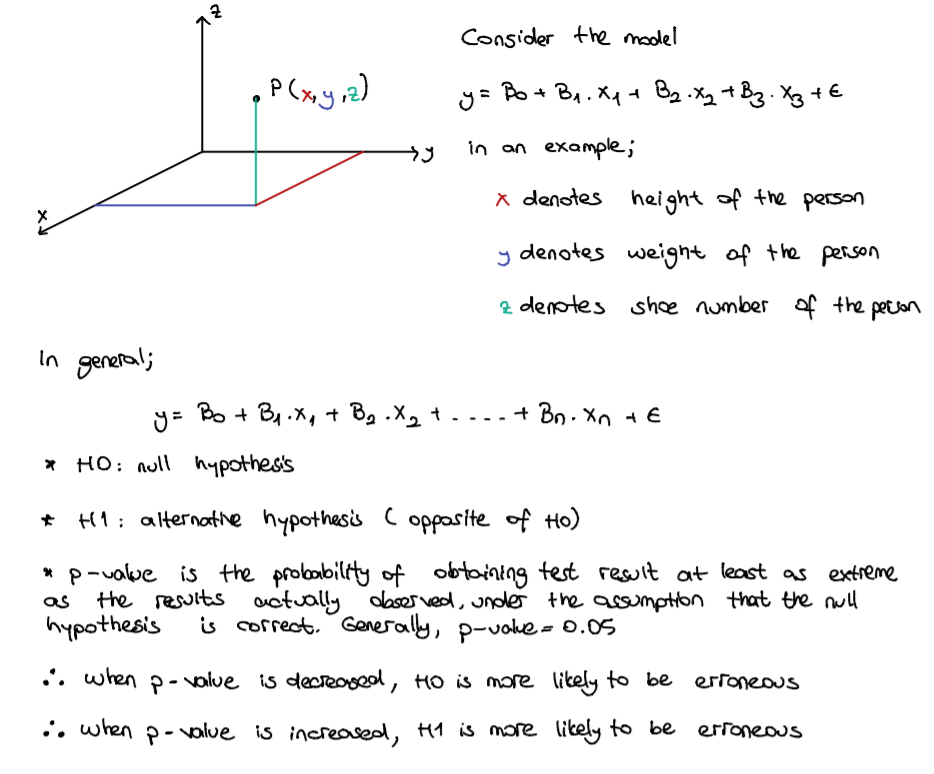

##Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##Data Uploading

In [3]:
missingvalues=pd.read_csv('missingvalues.csv')
missingvalues

,country,height,weight,age,gender
0,tr,130,30,10.0,m
1,tr,125,36,11.0,w
2,tr,135,34,10.0,w
3,tr,133,30,9.0,w
4,tr,129,38,12.0,m
5,tr,180,90,30.0,m
6,tr,190,80,25.0,m
7,tr,175,90,35.0,m
8,tr,177,60,22.0,w
9,us,185,105,33.0,m


##Check for missing values

In [4]:
missingvalues.isnull().sum()

country    0
height     0
weight     0
age        2
gender     0
dtype: int64

##Fill NaN values with mean of related column

In [5]:
HeightWeightAge=missingvalues.iloc[:,1:4].values

from sklearn.impute import SimpleImputer
imputer= SimpleImputer(missing_values=np.nan, strategy='mean')

imputer=imputer.fit(HeightWeightAge[:,1:4])
HeightWeightAge[:,1:4]=imputer.transform(HeightWeightAge[:,1:4])

In [6]:
HeightWeightAge#missing values in age column filled with the mean of age column

array([[130.  ,  30.  ,  10.  ],
       [125.  ,  36.  ,  11.  ],
       [135.  ,  34.  ,  10.  ],
       [133.  ,  30.  ,   9.  ],
       [129.  ,  38.  ,  12.  ],
       [180.  ,  90.  ,  30.  ],
       [190.  ,  80.  ,  25.  ],
       [175.  ,  90.  ,  35.  ],
       [177.  ,  60.  ,  22.  ],
       [185.  , 105.  ,  33.  ],
       [165.  ,  55.  ,  27.  ],
       [155.  ,  50.  ,  44.  ],
       [160.  ,  58.  ,  28.45],
       [162.  ,  59.  ,  41.  ],
       [167.  ,  62.  ,  55.  ],
       [174.  ,  70.  ,  47.  ],
       [193.  ,  90.  ,  28.45],
       [187.  ,  80.  ,  27.  ],
       [183.  ,  88.  ,  28.  ],
       [159.  ,  40.  ,  29.  ],
       [164.  ,  66.  ,  32.  ],
       [166.  ,  56.  ,  42.  ]])

In [7]:
#Make HeightWeightAge a DataFrame
result1=pd.DataFrame(data=HeightWeightAge,index=range(22),columns=['height','weight','age'])
result1

,height,weight,age
0,130.0,30.0,10.00
1,125.0,36.0,11.00
2,135.0,34.0,10.00
3,133.0,30.0,9.00
4,129.0,38.0,12.00
5,180.0,90.0,30.00
6,190.0,80.0,25.00
7,175.0,90.0,35.00
8,177.0,60.0,22.00
9,185.0,105.0,33.00


##Convert categorical values to numerical values
for country column

In [8]:
country=missingvalues.iloc[:,0:1].values


from sklearn import preprocessing
#le: label endocing
le=preprocessing.LabelEncoder()
country[:,0]=le.fit_transform(missingvalues.iloc[:,0])

#ohe: One Hot Encoder
ohe= preprocessing.OneHotEncoder()
country=ohe.fit_transform(country).toarray()
country

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [9]:
result2=pd.DataFrame(data=country,index=range(22),columns=['fr','tr','us'])
result2

,fr,tr,us
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,1.0,0.0
6,0.0,1.0,0.0
7,0.0,1.0,0.0
8,0.0,1.0,0.0
9,0.0,0.0,1.0


for gender column

In [10]:
gender=missingvalues.iloc[:,-1:].values

from sklearn import preprocessing
#le: label endocing
le=preprocessing.LabelEncoder()
genderNumerical=missingvalues.iloc[:,-1:].values
genderNumerical[:,-1]=le.fit_transform(missingvalues.iloc[:,-1])

#ohe: One Hot Encoder
ohe= preprocessing.OneHotEncoder()
genderNumerical=ohe.fit_transform(genderNumerical).toarray()

genderNumerical

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

IMPORTANT##

To avoid dummy variable trap while merging gender, focus on only one gender

In [11]:
result3=pd.DataFrame(data=genderNumerical[:,:1],index=range(22),columns=['gender'])
print("PS: 1 means man, 0 means woman")
result3

PS: 1 means man, 0 means woman


,gender
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0
5,1.0
6,1.0
7,1.0
8,0.0
9,1.0


##Concat all DataFrames

In [12]:
completeResult=pd.concat([result1,result2,result3],axis=1)
completeResult

,height,weight,age,fr,tr,us,gender
0,130.0,30.0,10.00,0.0,1.0,0.0,1.0
1,125.0,36.0,11.00,0.0,1.0,0.0,0.0
2,135.0,34.0,10.00,0.0,1.0,0.0,0.0
3,133.0,30.0,9.00,0.0,1.0,0.0,0.0
4,129.0,38.0,12.00,0.0,1.0,0.0,1.0
5,180.0,90.0,30.00,0.0,1.0,0.0,1.0
6,190.0,80.0,25.00,0.0,1.0,0.0,1.0
7,175.0,90.0,35.00,0.0,1.0,0.0,1.0
8,177.0,60.0,22.00,0.0,1.0,0.0,0.0
9,185.0,105.0,33.00,0.0,0.0,1.0,1.0


In [13]:
#x=independent variables are country height and age
#y=dependent variable is gender

In [14]:
x=completeResult.iloc[:,0:6]
x

,height,weight,age,fr,tr,us
0,130.0,30.0,10.00,0.0,1.0,0.0
1,125.0,36.0,11.00,0.0,1.0,0.0
2,135.0,34.0,10.00,0.0,1.0,0.0
3,133.0,30.0,9.00,0.0,1.0,0.0
4,129.0,38.0,12.00,0.0,1.0,0.0
5,180.0,90.0,30.00,0.0,1.0,0.0
6,190.0,80.0,25.00,0.0,1.0,0.0
7,175.0,90.0,35.00,0.0,1.0,0.0
8,177.0,60.0,22.00,0.0,1.0,0.0
9,185.0,105.0,33.00,0.0,0.0,1.0


In [15]:
y=completeResult.iloc[:,-1:]
y

,gender
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0
5,1.0
6,1.0
7,1.0
8,0.0
9,1.0


##Create Train and Test Split

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [17]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##Make predictions

In [18]:
y_pred=regressor.predict(x_test)
y_pred

array([[ 0.99290006],
       [-0.11449329],
       [ 0.09298872],
       [ 0.09586046],
       [ 0.72250046],
       [ 0.66930853],
       [-0.00334825],
       [ 0.33692765]])

In [19]:
y_test

,gender
20,0.0
10,0.0
14,0.0
13,0.0
1,0.0
21,0.0
11,0.0
19,0.0


Now let's try to guess the height by considering other datas

In [20]:
height=completeResult.iloc[:,0:1].values
height

array([[130.],
       [125.],
       [135.],
       [133.],
       [129.],
       [180.],
       [190.],
       [175.],
       [177.],
       [185.],
       [165.],
       [155.],
       [160.],
       [162.],
       [167.],
       [174.],
       [193.],
       [187.],
       [183.],
       [159.],
       [164.],
       [166.]])

In [21]:
datas=completeResult.iloc[:,1:]
datas

,weight,age,fr,tr,us,gender
0,30.0,10.00,0.0,1.0,0.0,1.0
1,36.0,11.00,0.0,1.0,0.0,0.0
2,34.0,10.00,0.0,1.0,0.0,0.0
3,30.0,9.00,0.0,1.0,0.0,0.0
4,38.0,12.00,0.0,1.0,0.0,1.0
5,90.0,30.00,0.0,1.0,0.0,1.0
6,80.0,25.00,0.0,1.0,0.0,1.0
7,90.0,35.00,0.0,1.0,0.0,1.0
8,60.0,22.00,0.0,1.0,0.0,0.0
9,105.0,33.00,0.0,0.0,1.0,1.0


In [22]:
x_train, x_test,y_train,y_test=train_test_split(datas,height,test_size=0.33,random_state=0)

In [23]:
r2=LinearRegression()
r2.fit(x_train,y_train)

y_pred=r2.predict(x_test)
y_pred

array([[182.25496542],
       [153.60175918],
       [163.03243328],
       [158.79170543],
       [144.14092247],
       [173.75783348],
       [150.54725552],
       [157.27677179]])

In [24]:
y_test

array([[164.],
       [165.],
       [167.],
       [162.],
       [125.],
       [166.],
       [155.],
       [159.]])

In [25]:
'''by comparing y_pred and y_test values we can basically say that the model 
is not bad, we can make it better by using backward elimination'''

'by comparing y_pred and y_test values we can basically say that the model \nis not bad, we can make it better by using backward elimination'

##Backward Elimination

In [26]:
import statsmodels.api as sm
X=np.append(arr=np.ones((22,1)).astype(int),values=datas,axis=1)
X ##beta0 added

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


array([[  1.  ,  30.  ,  10.  ,   0.  ,   1.  ,   0.  ,   1.  ],
       [  1.  ,  36.  ,  11.  ,   0.  ,   1.  ,   0.  ,   0.  ],
       [  1.  ,  34.  ,  10.  ,   0.  ,   1.  ,   0.  ,   0.  ],
       [  1.  ,  30.  ,   9.  ,   0.  ,   1.  ,   0.  ,   0.  ],
       [  1.  ,  38.  ,  12.  ,   0.  ,   1.  ,   0.  ,   1.  ],
       [  1.  ,  90.  ,  30.  ,   0.  ,   1.  ,   0.  ,   1.  ],
       [  1.  ,  80.  ,  25.  ,   0.  ,   1.  ,   0.  ,   1.  ],
       [  1.  ,  90.  ,  35.  ,   0.  ,   1.  ,   0.  ,   1.  ],
       [  1.  ,  60.  ,  22.  ,   0.  ,   1.  ,   0.  ,   0.  ],
       [  1.  , 105.  ,  33.  ,   0.  ,   0.  ,   1.  ,   1.  ],
       [  1.  ,  55.  ,  27.  ,   0.  ,   0.  ,   1.  ,   0.  ],
       [  1.  ,  50.  ,  44.  ,   0.  ,   0.  ,   1.  ,   0.  ],
       [  1.  ,  58.  ,  28.45,   0.  ,   0.  ,   1.  ,   0.  ],
       [  1.  ,  59.  ,  41.  ,   0.  ,   0.  ,   1.  ,   0.  ],
       [  1.  ,  62.  ,  55.  ,   0.  ,   0.  ,   1.  ,   0.  ],
       [  1.  ,  70.  ,  

In [27]:
X_l=datas.iloc[:,:].values
print(X_l)
X_l=np.array(X_l,dtype=float)
model=sm.OLS(height,X_l).fit()
model.summary()

[[ 30.    10.     0.     1.     0.     1.  ]
 [ 36.    11.     0.     1.     0.     0.  ]
 [ 34.    10.     0.     1.     0.     0.  ]
 [ 30.     9.     0.     1.     0.     0.  ]
 [ 38.    12.     0.     1.     0.     1.  ]
 [ 90.    30.     0.     1.     0.     1.  ]
 [ 80.    25.     0.     1.     0.     1.  ]
 [ 90.    35.     0.     1.     0.     1.  ]
 [ 60.    22.     0.     1.     0.     0.  ]
 [105.    33.     0.     0.     1.     1.  ]
 [ 55.    27.     0.     0.     1.     0.  ]
 [ 50.    44.     0.     0.     1.     0.  ]
 [ 58.    28.45   0.     0.     1.     0.  ]
 [ 59.    41.     0.     0.     1.     0.  ]
 [ 62.    55.     0.     0.     1.     0.  ]
 [ 70.    47.     1.     0.     0.     1.  ]
 [ 90.    28.45   1.     0.     0.     1.  ]
 [ 80.    27.     1.     0.     0.     1.  ]
 [ 88.    28.     1.     0.     0.     1.  ]
 [ 40.    29.     1.     0.     0.     0.  ]
 [ 66.    32.     1.     0.     0.     0.  ]
 [ 56.    42.     1.     0.     0.     0.  ]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     20.53
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           1.91e-06
Time:                        20:08:50   Log-Likelihood:                -75.726
No. Observations:                  22   AIC:                             163.5
Df Residuals:                      16   BIC:                             170.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8603      0.138      6.212      0.000       0.567       1.154
x2             0.1688      0.237      0.713      0.486      -0.333       0.671
x3           112.9519      8.963     12.602      0.000      93.951     131.953
x4           106.5009      6.247     17.048      0.000      93.257     119.745
x5           104.5322      9.974     10.480      0.000      83.388     125.677
x6            -6.4004      5.689     -1.125      0.277     -18.461       5.661
==============================================================================
Omnibus:                        1.115   Durbin-Watson:                   2.920
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                0.557
Skew:                           0.390   Prob(JB):                        0.757
Kurtosis:                       2.985   Cond. No.                         533.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
#the p-value of x2 is quite big by considering 0.05, 
#then lets eliminate x2 that means first column

In [29]:
X_l=datas.iloc[:,[0,2,3,4,5]].values
X_l

array([[ 30.,   0.,   1.,   0.,   1.],
       [ 36.,   0.,   1.,   0.,   0.],
       [ 34.,   0.,   1.,   0.,   0.],
       [ 30.,   0.,   1.,   0.,   0.],
       [ 38.,   0.,   1.,   0.,   1.],
       [ 90.,   0.,   1.,   0.,   1.],
       [ 80.,   0.,   1.,   0.,   1.],
       [ 90.,   0.,   1.,   0.,   1.],
       [ 60.,   0.,   1.,   0.,   0.],
       [105.,   0.,   0.,   1.,   1.],
       [ 55.,   0.,   0.,   1.,   0.],
       [ 50.,   0.,   0.,   1.,   0.],
       [ 58.,   0.,   0.,   1.,   0.],
       [ 59.,   0.,   0.,   1.,   0.],
       [ 62.,   0.,   0.,   1.,   0.],
       [ 70.,   1.,   0.,   0.,   1.],
       [ 90.,   1.,   0.,   0.,   1.],
       [ 80.,   1.,   0.,   0.,   1.],
       [ 88.,   1.,   0.,   0.,   1.],
       [ 40.,   1.,   0.,   0.,   0.],
       [ 66.,   1.,   0.,   0.,   0.],
       [ 56.,   1.,   0.,   0.,   0.]])

In [30]:
X_l=np.array(X_l,dtype=float)
model=sm.OLS(height,X_l).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     26.29
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           4.36e-07
Time:                        20:08:56   Log-Likelihood:                -76.070
No. Observations:                  22   AIC:                             162.1
Df Residuals:                      17   BIC:                             167.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9017      0.124      7.282      0.000       0.640       1.163
x2           116.1392      7.655     15.171      0.000      99.988     132.290
x3           107.7760      5.899     18.272      0.000      95.331     120.221
x4           108.4051      8.243     13.151      0.000      91.014     125.796
x5            -7.2064      5.495     -1.312      0.207     -18.799       4.386
==============================================================================
Omnibus:                        0.831   Durbin-Watson:                   2.836
Prob(Omnibus):                  0.660   Jarque-Bera (JB):                0.232
Skew:                           0.245   Prob(JB):                        0.891
Kurtosis:                       3.109   Cond. No.                         426.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#the p-value of x5 is quite big by considering 0.05, 
#then lets eliminate x5 that means forth column

In [32]:
X_l=datas.iloc[:,[0,2,3,5]].values
X_l

array([[ 30.,   0.,   1.,   1.],
       [ 36.,   0.,   1.,   0.],
       [ 34.,   0.,   1.,   0.],
       [ 30.,   0.,   1.,   0.],
       [ 38.,   0.,   1.,   1.],
       [ 90.,   0.,   1.,   1.],
       [ 80.,   0.,   1.,   1.],
       [ 90.,   0.,   1.,   1.],
       [ 60.,   0.,   1.,   0.],
       [105.,   0.,   0.,   1.],
       [ 55.,   0.,   0.,   0.],
       [ 50.,   0.,   0.,   0.],
       [ 58.,   0.,   0.,   0.],
       [ 59.,   0.,   0.,   0.],
       [ 62.,   0.,   0.,   0.],
       [ 70.,   1.,   0.,   1.],
       [ 90.,   1.,   0.,   1.],
       [ 80.,   1.,   0.,   1.],
       [ 88.,   1.,   0.,   1.],
       [ 40.,   1.,   0.,   0.],
       [ 66.,   1.,   0.,   0.],
       [ 56.,   1.,   0.,   0.]])

In [33]:
X_l=np.array(X_l,dtype=float)
model=sm.OLS(height,X_l).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              180.6
Date:                Tue, 02 Feb 2021   Prob (F-statistic):                    2.91e-14
Time:                        20:09:02   Log-Likelihood:                         -102.62
No. Observations:                  22   AIC:                                      213.2
Df Residuals:                      18   BIC:                                      217.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.3640      0.177     13.347      0.000       1.992       2.736
x2            36.7593     15.295      2.403      0.027       4.625      68.893
x3            50.8290     13.011      3.907      0.001      23.494      78.164
x4           -47.4185     14.830     -3.197      0.005     -78.576     -16.261
==============================================================================
Omnibus:                        0.504   Durbin-Watson:                   1.640
Prob(Omnibus):                  0.777   Jarque-Bera (JB):                0.576
Skew:                          -0.041   Prob(JB):                        0.750
Kurtosis:                       2.211   Cond. No.                         198.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
#now all p-values are smaller than 0.05